![title](img/header.png)

In [23]:
import numpy as np
# Imports
from sklearn.datasets.samples_generator import make_blobs

# Generate 2D data points
X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449


In [24]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [25]:
# A helper function to calculate the Euclidean diatance between the data 
# points and the centroids

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [26]:
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
print(data.head())

     Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 1  1.005079  4.594642     2.091397     3.320997     2.318921
1  Object 2  1.128478  4.328122     2.153620     3.124601     2.025236
2  Object 3  2.117881  0.726845     4.520479     2.443428     1.777070
3  Object 4  0.955626  4.385907     1.993339     3.108686     2.155774
4  Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823


In [39]:
# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)
#data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].argmin

# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})
    
# Get a preview of the data
print(data.head(10))


      Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0   Object 1  1.005079  4.594642     2.091397     3.320997     2.318921   
1   Object 2  1.128478  4.328122     2.153620     3.124601     2.025236   
2   Object 3  2.117881  0.726845     4.520479     2.443428     1.777070   
3   Object 4  0.955626  4.385907     1.993339     3.108686     2.155774   
4   Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823   
5   Object 6 -1.072953  2.627009     1.374928     1.425551     3.075577   
6   Object 7 -2.037502  3.048606     1.407679     2.403038     4.074603   
7   Object 8  2.354083  0.856632     4.596807     2.633869     1.681081   
8   Object 9  2.144040  0.964399     4.370339     2.404453     1.542342   
9  Object 10  1.166288  4.273516     2.183487     3.091785     1.959703   

  Cluster  
0      C1  
1      C3  
2      C3  
3      C1  
4      C1  
5      C1  
6      C1  
7      C3  
8      C3  
9      C3  


E:\InstalledC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


In [30]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (-0.500753347459331, 3.4851226841526897)
Centroid 2 (1.7821539902873855, 2.2299026522421928)


In [31]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [32]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[-1.48815728  2.81502145]
 [ 2.20533486  0.84929168]
 [ 1.06386762  4.39554682]]
[2 2 1 2 0 0 0 1 1 2]


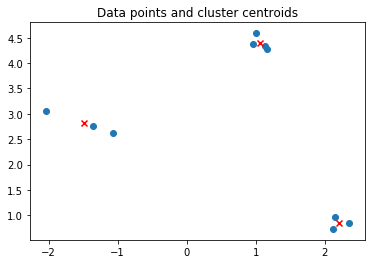

In [34]:
# Plotting the cluster centers and the data points on a 2D plane
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [35]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873335


![title](img/thumbs-up.png)